In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# DATASET 3 (Pre-processing)

In [3]:
ds3 = pd.read_csv('data_3.csv')

Above code is loading data from a CSV file into a format that makes it easier to analyze and manipulate the data using pandas.

In [4]:
ds3

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,620,29-01-2011,1,0,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,29-01-2011,1,0,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,622,29-01-2011,1,0,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,623,29-01-2011,1,0,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,624,29-01-2011,1,0,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,28-01-2011,1,0,1,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62
386,616,28-01-2011,1,0,1,21,False,5,2,0.22,0.2273,0.75,0.1343,1,57,58
387,617,28-01-2011,1,0,1,22,False,5,1,0.24,0.2121,0.65,0.3582,0,26,26
388,618,28-01-2011,1,0,1,23,False,5,1,0.24,0.2273,0.60,0.2239,1,22,23


In [5]:
ds3.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,620,29-01-2011,1,0,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,29-01-2011,1,0,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15


.head() shows the top 5 rows if we have not given any specific no. of desired rows.

In [6]:
ds3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     390 non-null    int64  
 1   dteday      390 non-null    object 
 2   season      390 non-null    int64  
 3   yr          390 non-null    int64  
 4   mnth        390 non-null    int64  
 5   hr          390 non-null    int64  
 6   holiday     390 non-null    bool   
 7   weekday     390 non-null    int64  
 8   weathersit  390 non-null    int64  
 9   temp        390 non-null    float64
 10  atemp       390 non-null    float64
 11  hum         390 non-null    float64
 12  windspeed   390 non-null    float64
 13  casual      390 non-null    int64  
 14  registered  390 non-null    int64  
 15  cnt         390 non-null    int64  
dtypes: bool(1), float64(4), int64(10), object(1)
memory usage: 46.2+ KB


From .info(), we can see the data types, count, no of null/non-null values and many more.

In [7]:
ds3.drop('yr',axis=1, inplace=True)

In Above, I have dropped year because it has only 0 values.

In [8]:
ds3

,instant,dteday,season,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,620,29-01-2011,1,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,29-01-2011,1,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,622,29-01-2011,1,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,623,29-01-2011,1,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,624,29-01-2011,1,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,28-01-2011,1,1,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62
386,616,28-01-2011,1,1,21,False,5,2,0.22,0.2273,0.75,0.1343,1,57,58
387,617,28-01-2011,1,1,22,False,5,1,0.24,0.2121,0.65,0.3582,0,26,26
388,618,28-01-2011,1,1,23,False,5,1,0.24,0.2273,0.60,0.2239,1,22,23


In [9]:
ds3_new = ds3.rename(columns={"dteday":"Date","season":"Season","mnth":"Month","hr":"Hour","holiday":"Holiday","weekday":"Weekdays","weathersit":"Weather-situation","temp":"Temperature","atemp":"Atemp","hum":"Humidity","windspeed":"Windspeed","casual":"Casual","registered":"Registered","cnt":"Total Count"})

ds3_new

,instant,Date,Season,Month,Hour,Holiday,Weekdays,Weather-situation,Temperature,Atemp,Humidity,Windspeed,Casual,Registered,Total Count
0,620,29-01-2011,1,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,29-01-2011,1,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,622,29-01-2011,1,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,623,29-01-2011,1,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,624,29-01-2011,1,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,28-01-2011,1,1,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62
386,616,28-01-2011,1,1,21,False,5,2,0.22,0.2273,0.75,0.1343,1,57,58
387,617,28-01-2011,1,1,22,False,5,1,0.24,0.2121,0.65,0.3582,0,26,26
388,618,28-01-2011,1,1,23,False,5,1,0.24,0.2273,0.60,0.2239,1,22,23


In Above code, I have used .rename for changing column names so that it looks more attractive.

In [10]:
season_name = {1:'Spring',2:'Summer',3:'Fall',4:'Winter'}
ds3_new['Season'] = ds3_new['Season'].map(season_name)

weather_sit = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
ds3_new['Weather-situation'] = ds3_new['Weather-situation'].map(weather_sit)

ds3_new

,instant,Date,Season,Month,Hour,Holiday,Weekdays,Weather-situation,Temperature,Atemp,Humidity,Windspeed,Casual,Registered,Total Count
0,620,29-01-2011,Spring,1,1,False,6,Clear,0.22,0.2273,0.64,0.1940,0,20,20
1,621,29-01-2011,Spring,1,2,False,6,Clear,0.22,0.2273,0.64,0.1642,0,15,15
2,622,29-01-2011,Spring,1,3,False,6,Clear,0.20,0.2121,0.64,0.1343,3,5,8
3,623,29-01-2011,Spring,1,4,False,6,Clear,0.16,0.1818,0.69,0.1045,1,2,3
4,624,29-01-2011,Spring,1,6,False,6,Clear,0.16,0.1818,0.64,0.1343,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,28-01-2011,Spring,1,20,False,5,Mist,0.24,0.2273,0.70,0.1940,1,61,62
386,616,28-01-2011,Spring,1,21,False,5,Mist,0.22,0.2273,0.75,0.1343,1,57,58
387,617,28-01-2011,Spring,1,22,False,5,Clear,0.24,0.2121,0.65,0.3582,0,26,26
388,618,28-01-2011,Spring,1,23,False,5,Clear,0.24,0.2273,0.60,0.2239,1,22,23


In Project report, details are given for Season and Weather-situation so I have just updated it here with the use of above code. Now It looks more clear to understand.

In [11]:
ds3_new.isnull().sum()

instant              0
Date                 0
Season               0
Month                0
Hour                 0
Holiday              0
Weekdays             0
Weather-situation    0
Temperature          0
Atemp                0
Humidity             0
Windspeed            0
Casual               0
Registered           0
Total Count          0
dtype: int64

From Above code, we are looking for any null values but here is no null value.

In [12]:
ds3_new.duplicated().sum()

0

In [13]:
def fahrn_to_clsius(x):
    value = (x-32) * 5/9
    return value

ds3_new['Temperature'] = ds3_new['Temperature'].apply(fahrn_to_clsius)




def fahrn_to_clsius(x):
    value = (x-32) * 5/9
    return value

ds3_new['Atemp'] = ds3_new['Atemp'].apply(fahrn_to_clsius)



ds3_new

,instant,Date,Season,Month,Hour,Holiday,Weekdays,Weather-situation,Temperature,Atemp,Humidity,Windspeed,Casual,Registered,Total Count
0,620,29-01-2011,Spring,1,1,False,6,Clear,-17.655556,-17.651500,0.64,0.1940,0,20,20
1,621,29-01-2011,Spring,1,2,False,6,Clear,-17.655556,-17.651500,0.64,0.1642,0,15,15
2,622,29-01-2011,Spring,1,3,False,6,Clear,-17.666667,-17.659944,0.64,0.1343,3,5,8
3,623,29-01-2011,Spring,1,4,False,6,Clear,-17.688889,-17.676778,0.69,0.1045,1,2,3
4,624,29-01-2011,Spring,1,6,False,6,Clear,-17.688889,-17.676778,0.64,0.1343,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,28-01-2011,Spring,1,20,False,5,Mist,-17.644444,-17.651500,0.70,0.1940,1,61,62
386,616,28-01-2011,Spring,1,21,False,5,Mist,-17.655556,-17.651500,0.75,0.1343,1,57,58
387,617,28-01-2011,Spring,1,22,False,5,Clear,-17.644444,-17.659944,0.65,0.3582,0,26,26
388,618,28-01-2011,Spring,1,23,False,5,Clear,-17.644444,-17.651500,0.60,0.2239,1,22,23


In Above code, I have changed Temperature and Atemp data from Fahrenheit to Celsius as per data requires.

# VISUALISATIONS (Pie Chart + Scatter Plot)

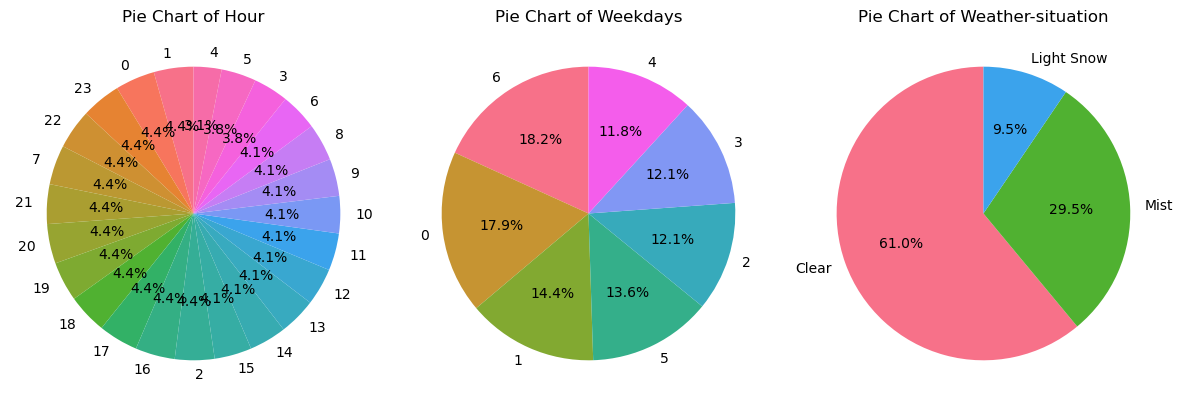

In [14]:
columns = ['Hour','Weekdays','Weather-situation',]

plt.figure(figsize=(12,18))
for i, column in enumerate(columns,1):
    plt.subplot(3,3,i)
    data = ds3_new[column].value_counts()
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('husl',len(data)))
    plt.title(f'Pie Chart of {column}')
    
    
plt.tight_layout()
plt.show()

 Scatter Plot

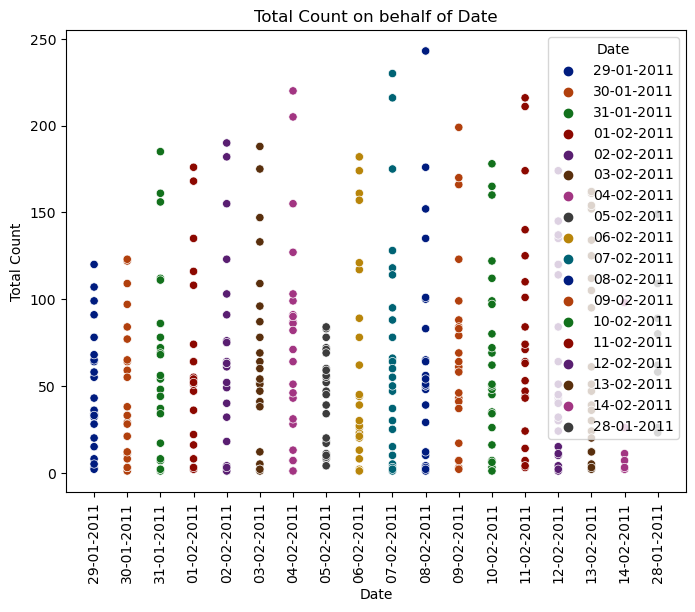

In [15]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=ds3_new, x='Date', y='Total Count',hue='Date', palette='dark')
plt.title('Total Count on behalf of Date')
plt.xticks(rotation=90)
plt.show()

# CONCATENATE DATASET 3 With MERGE DATASET 1 & 2

In [16]:
ds1_merge_2 = pd.read_csv('data 1 & 2.csv')
ds1_merge_2.drop('Unnamed: 0',axis =1, inplace=True)
ds1_merge_2

,instant,Date,Season,Month,Hour,Holiday,Weekdays,Weather-situation,Temperature,Atemp,Humidity,Windspeed,Casual,Registered,Total Count
0,1,01-01-2011,Spring,1,0,False,6,Clear,-17.644444,-17.617833,0.81,0.0000,3,13,16
1,2,01-01-2011,Spring,1,1,False,6,Clear,-17.655556,-17.626278,0.80,0.0000,8,32,40
2,3,01-01-2011,Spring,1,2,False,6,Clear,-17.655556,-17.626278,0.80,0.0000,5,27,32
3,4,01-01-2011,Spring,1,3,False,6,Clear,-17.644444,-17.617833,0.75,0.0000,3,10,13
4,5,01-01-2011,Spring,1,4,False,6,Clear,-17.644444,-17.617833,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,28-01-2011,Spring,1,11,False,5,Light Snow,-17.677778,-17.659944,0.93,0.1045,0,30,30
606,607,28-01-2011,Spring,1,12,False,5,Light Snow,-17.677778,-17.659944,0.93,0.1045,1,28,29
607,608,28-01-2011,Spring,1,13,False,5,Light Snow,-17.677778,-17.659944,0.93,0.1045,0,31,31
608,609,28-01-2011,Spring,1,14,False,5,Light Snow,-17.655556,-17.626278,0.80,0.0000,2,36,38


 Here, I have loaded the merge data from 1 and 2.

 Also dropping unnecessary column.

In [17]:
ds3_new

,instant,Date,Season,Month,Hour,Holiday,Weekdays,Weather-situation,Temperature,Atemp,Humidity,Windspeed,Casual,Registered,Total Count
0,620,29-01-2011,Spring,1,1,False,6,Clear,-17.655556,-17.651500,0.64,0.1940,0,20,20
1,621,29-01-2011,Spring,1,2,False,6,Clear,-17.655556,-17.651500,0.64,0.1642,0,15,15
2,622,29-01-2011,Spring,1,3,False,6,Clear,-17.666667,-17.659944,0.64,0.1343,3,5,8
3,623,29-01-2011,Spring,1,4,False,6,Clear,-17.688889,-17.676778,0.69,0.1045,1,2,3
4,624,29-01-2011,Spring,1,6,False,6,Clear,-17.688889,-17.676778,0.64,0.1343,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,28-01-2011,Spring,1,20,False,5,Mist,-17.644444,-17.651500,0.70,0.1940,1,61,62
386,616,28-01-2011,Spring,1,21,False,5,Mist,-17.655556,-17.651500,0.75,0.1343,1,57,58
387,617,28-01-2011,Spring,1,22,False,5,Clear,-17.644444,-17.659944,0.65,0.3582,0,26,26
388,618,28-01-2011,Spring,1,23,False,5,Clear,-17.644444,-17.651500,0.60,0.2239,1,22,23


In [18]:
ds4 = pd.concat([ds1_merge_2, ds3_new], axis=0, join='outer', ignore_index=True)

This code combines ds1_merge_2 and ds3_new into a single DataFrame ds4, ensuring all columns from both DataFrames are retained and reindexing the rows for a clean, continuous index.

In [19]:
ds4

,instant,Date,Season,Month,Hour,Holiday,Weekdays,Weather-situation,Temperature,Atemp,Humidity,Windspeed,Casual,Registered,Total Count
0,1,01-01-2011,Spring,1,0,False,6,Clear,-17.644444,-17.617833,0.81,0.0000,3,13,16
1,2,01-01-2011,Spring,1,1,False,6,Clear,-17.655556,-17.626278,0.80,0.0000,8,32,40
2,3,01-01-2011,Spring,1,2,False,6,Clear,-17.655556,-17.626278,0.80,0.0000,5,27,32
3,4,01-01-2011,Spring,1,3,False,6,Clear,-17.644444,-17.617833,0.75,0.0000,3,10,13
4,5,01-01-2011,Spring,1,4,False,6,Clear,-17.644444,-17.617833,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,615,28-01-2011,Spring,1,20,False,5,Mist,-17.644444,-17.651500,0.70,0.1940,1,61,62
996,616,28-01-2011,Spring,1,21,False,5,Mist,-17.655556,-17.651500,0.75,0.1343,1,57,58
997,617,28-01-2011,Spring,1,22,False,5,Clear,-17.644444,-17.659944,0.65,0.3582,0,26,26
998,618,28-01-2011,Spring,1,23,False,5,Clear,-17.644444,-17.651500,0.60,0.2239,1,22,23


In [20]:
ds4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            1000 non-null   int64  
 1   Date               1000 non-null   object 
 2   Season             1000 non-null   object 
 3   Month              1000 non-null   int64  
 4   Hour               1000 non-null   int64  
 5   Holiday            1000 non-null   bool   
 6   Weekdays           1000 non-null   int64  
 7   Weather-situation  1000 non-null   object 
 8   Temperature        1000 non-null   float64
 9   Atemp              1000 non-null   float64
 10  Humidity           1000 non-null   float64
 11  Windspeed          1000 non-null   float64
 12  Casual             1000 non-null   int64  
 13  Registered         1000 non-null   int64  
 14  Total Count        1000 non-null   int64  
dtypes: bool(1), float64(4), int64(7), object(3)
memory usage: 110.5+ KB


From .info(), we can see the data types, count, no of null/non-null values and many more.

In [21]:
ds4.head()

,instant,Date,Season,Month,Hour,Holiday,Weekdays,Weather-situation,Temperature,Atemp,Humidity,Windspeed,Casual,Registered,Total Count
0,1,01-01-2011,Spring,1,0,False,6,Clear,-17.644444,-17.617833,0.81,0.0,3,13,16
1,2,01-01-2011,Spring,1,1,False,6,Clear,-17.655556,-17.626278,0.80,0.0,8,32,40
2,3,01-01-2011,Spring,1,2,False,6,Clear,-17.655556,-17.626278,0.80,0.0,5,27,32
3,4,01-01-2011,Spring,1,3,False,6,Clear,-17.644444,-17.617833,0.75,0.0,3,10,13
4,5,01-01-2011,Spring,1,4,False,6,Clear,-17.644444,-17.617833,0.75,0.0,0,1,1


In [22]:
ds4.tail()

,instant,Date,Season,Month,Hour,Holiday,Weekdays,Weather-situation,Temperature,Atemp,Humidity,Windspeed,Casual,Registered,Total Count
995,615,28-01-2011,Spring,1,20,False,5,Mist,-17.644444,-17.651500,0.70,0.1940,1,61,62
996,616,28-01-2011,Spring,1,21,False,5,Mist,-17.655556,-17.651500,0.75,0.1343,1,57,58
997,617,28-01-2011,Spring,1,22,False,5,Clear,-17.644444,-17.659944,0.65,0.3582,0,26,26
998,618,28-01-2011,Spring,1,23,False,5,Clear,-17.644444,-17.651500,0.60,0.2239,1,22,23
999,619,29-01-2011,Spring,1,0,False,6,Clear,-17.655556,-17.668333,0.64,0.3582,2,26,28


In [23]:
ds4.isnull().sum()

instant              0
Date                 0
Season               0
Month                0
Hour                 0
Holiday              0
Weekdays             0
Weather-situation    0
Temperature          0
Atemp                0
Humidity             0
Windspeed            0
Casual               0
Registered           0
Total Count          0
dtype: int64

In [24]:
ds4.duplicated().sum()

0

 # VISUALISATIONS (Line Plot + Pie Chart + Histogram Plot)

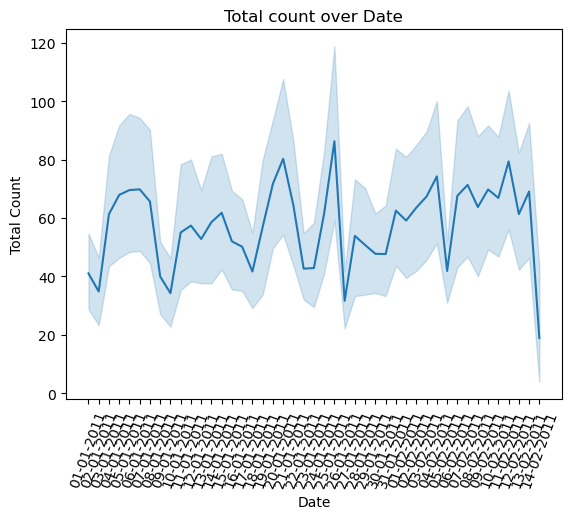

In [25]:
sns.lineplot(x='Date', y='Total Count', data=ds4)
plt.title('Total count over Date')
plt.xticks(rotation=70)
plt.show()

 From 01 January to 14 February 2011, Above data shows the total count for each single Date.

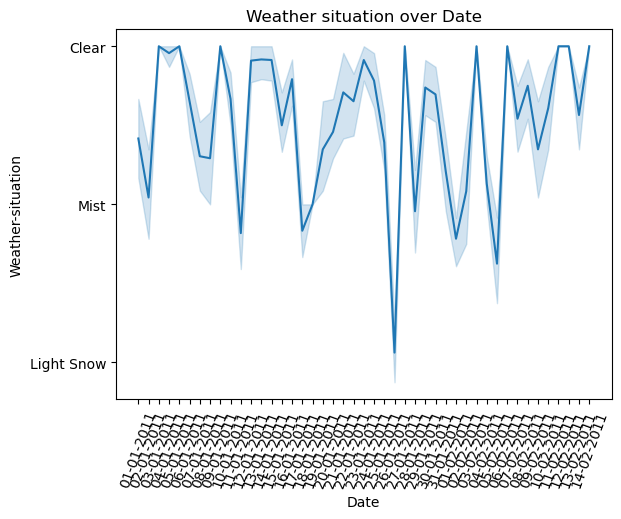

In [26]:
sns.lineplot(x='Date', y='Weather-situation', data=ds4)
plt.title('Weather situation over Date')
plt.xticks(rotation=70)
plt.show()

The Above code generates a line plot showing the 'Weather-situation' over time (dates).

The title provides a clear description of what the plot represents.

Rotating the X-axis labels ensures that date labels are readable.

This visualization can be useful to observe trends, patterns, or changes in weather situations over time.



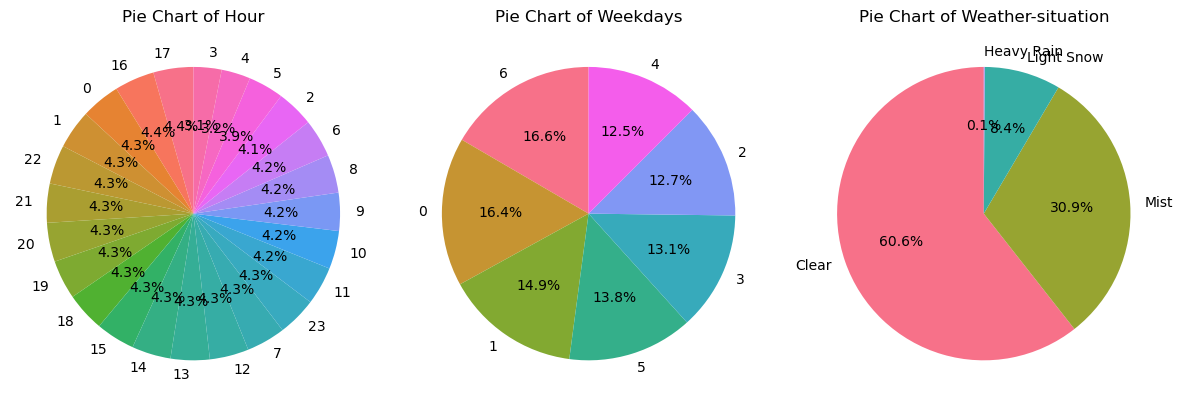

In [27]:
columns = ['Hour','Weekdays','Weather-situation',]

plt.figure(figsize=(12,18))
for i, column in enumerate(columns,1):
    plt.subplot(3,3,i)
    data = ds4[column].value_counts()
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('husl',len(data)))
    plt.title(f'Pie Chart of {column}')
    
    
plt.tight_layout()
plt.show()

This code generates pie charts for the Hour, Weekdays, and Weather-situation columns in the ds4 DataFrame.

For Hour, it has an average ratio of 4%.

For Weekdays, It has an average of 15%. Means in this data Weekdays contains similar ratio and place.

For Weather-situation, Most of the times(60%) the weather is Clear. Around 31%, Weather is Mist and rest are as shown above.

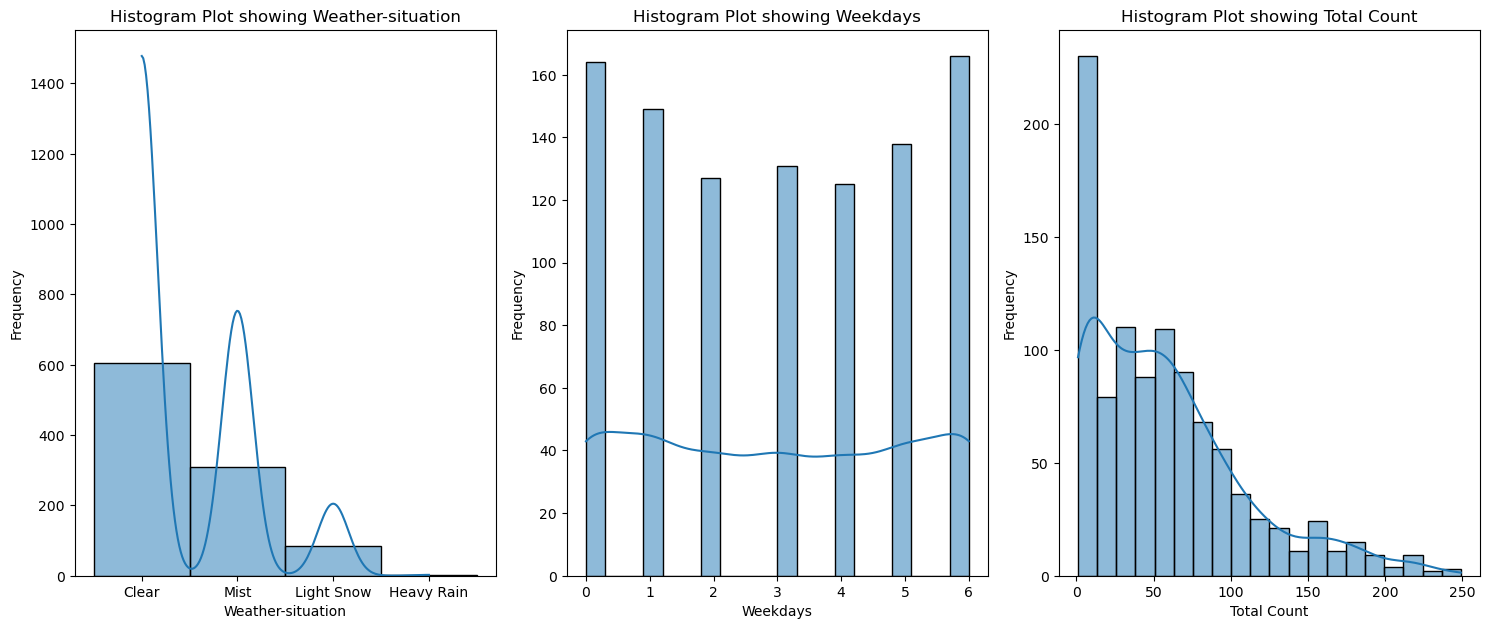

In [28]:
columns = ['Weather-situation','Weekdays','Total Count']

plt.figure(figsize=(15, 12))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(ds4[col], kde=True, bins=20)
    plt.title(f'Histogram Plot showing {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

 This Above code provides a clear visual representation of how the data in each of the specified columns is distributed, helping to identify patterns, outliers, and the overall shape of the data.

# FINDING OUTLIERS

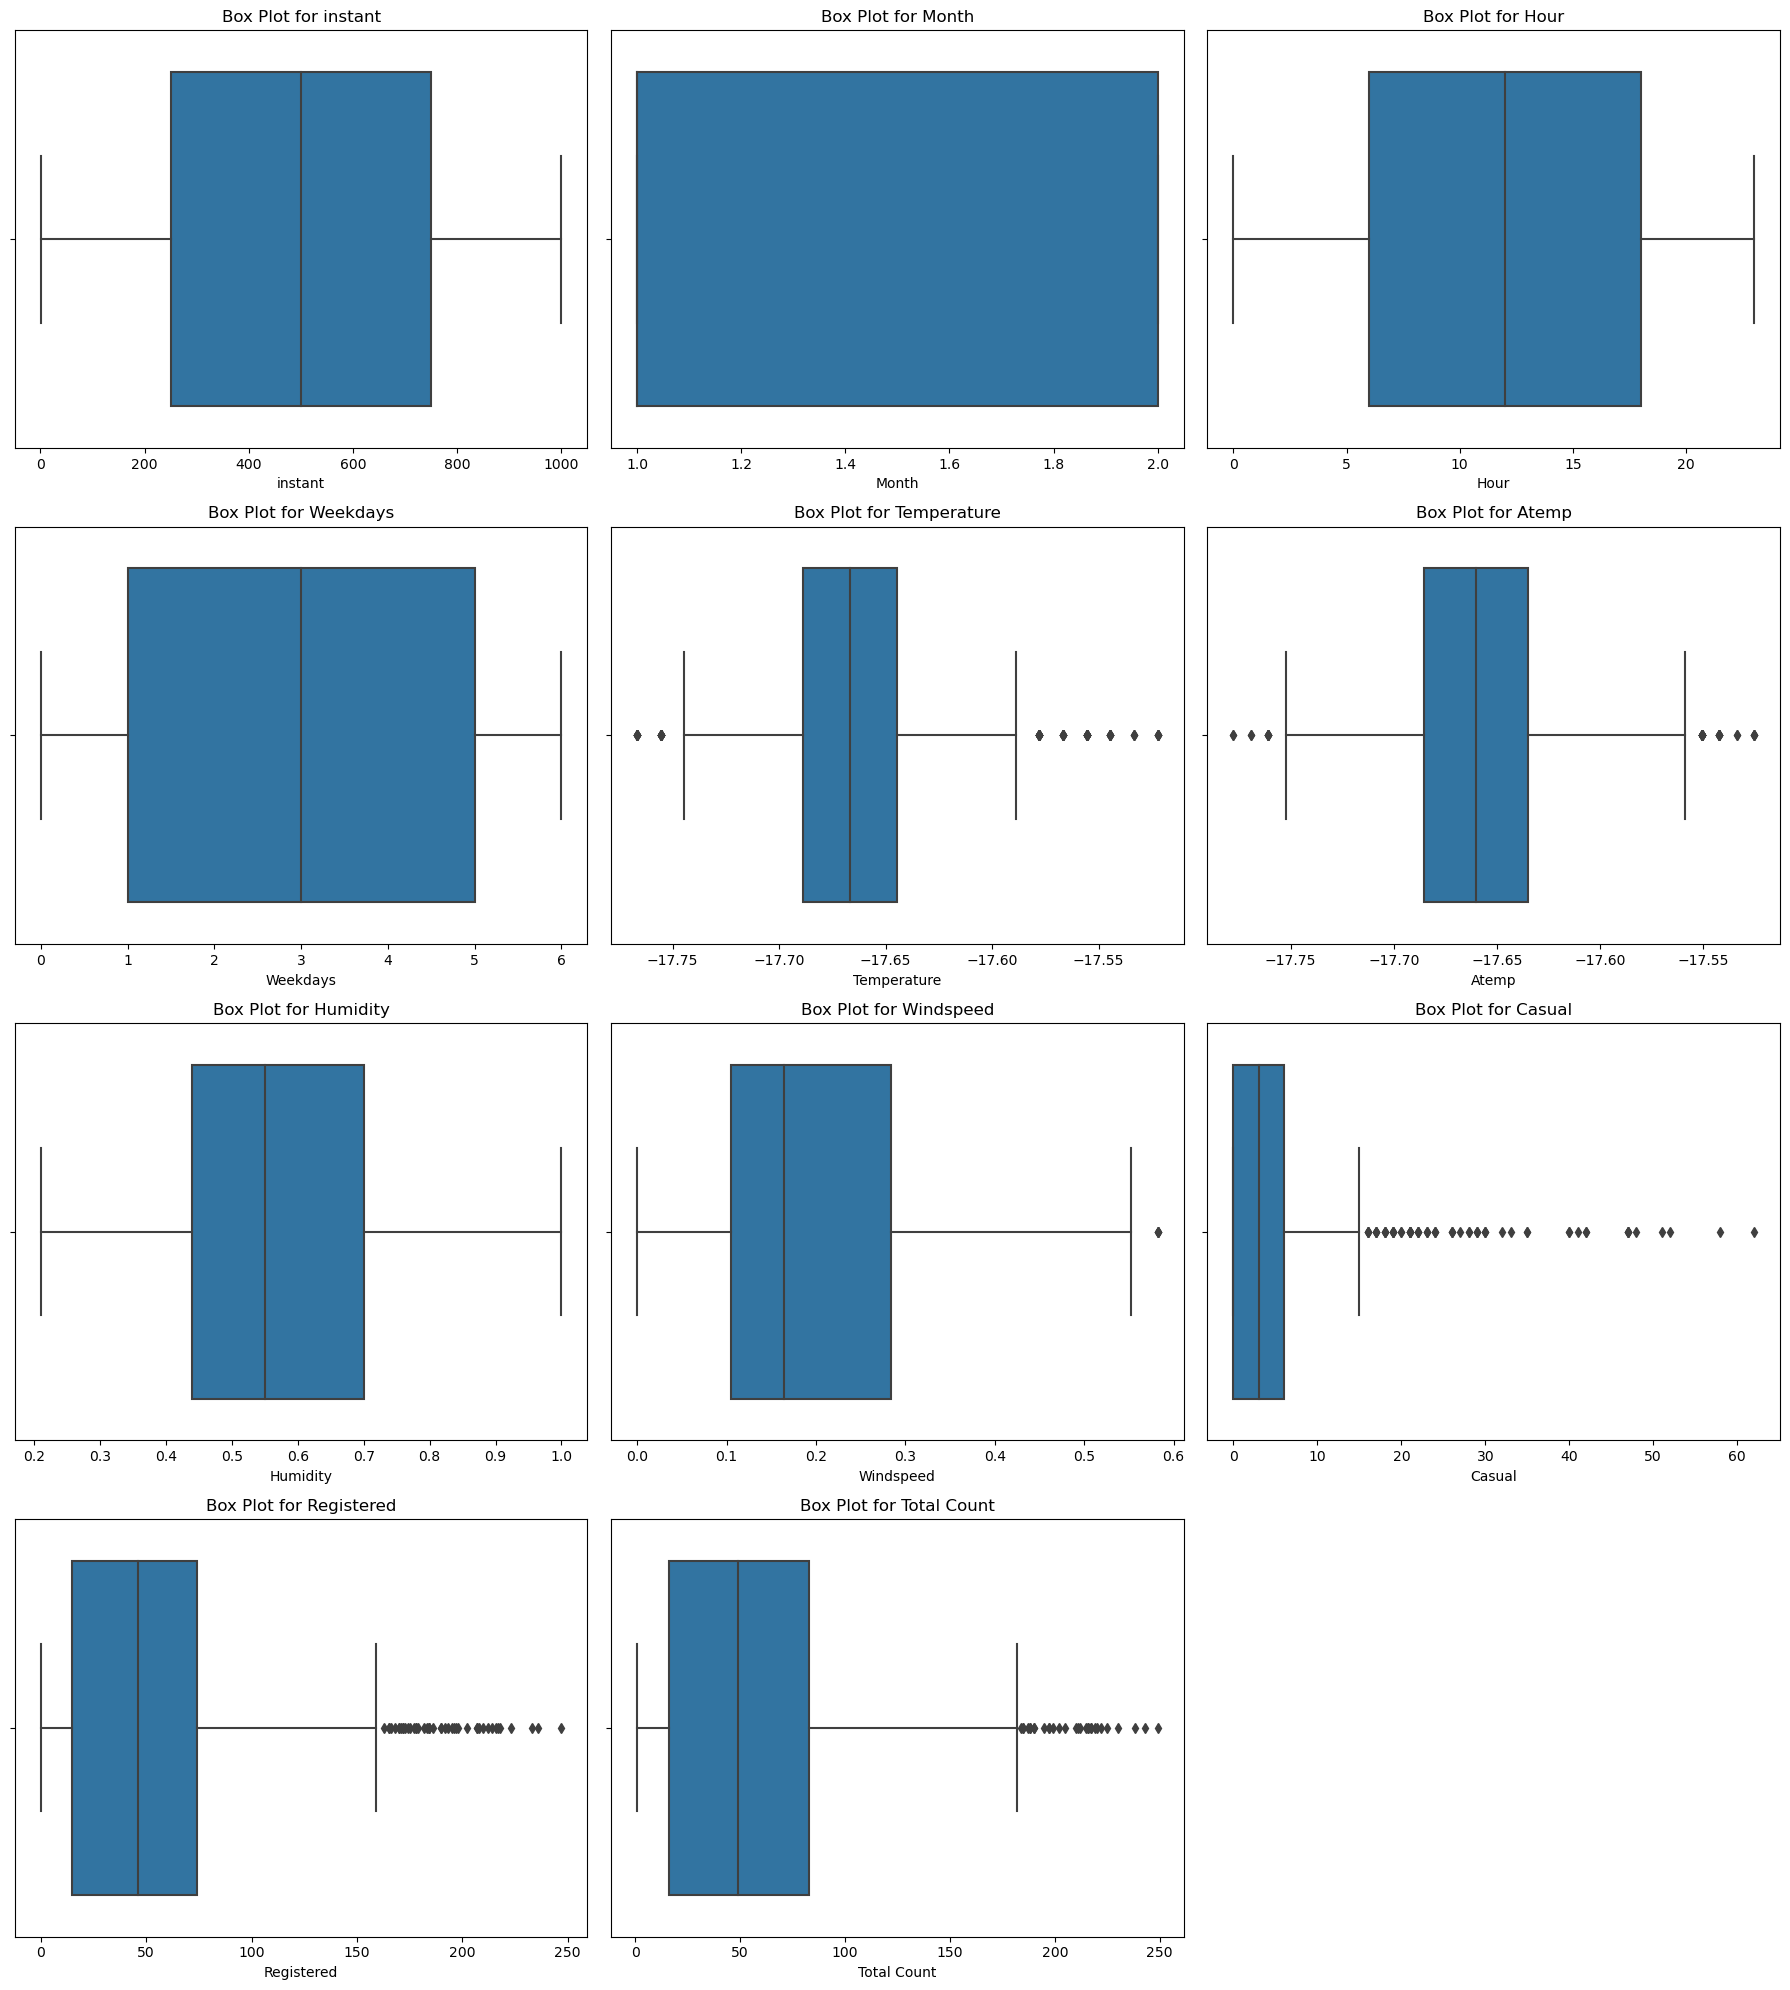

In [29]:
num_columns = ds4.select_dtypes(include=['float64','int64']).columns   
num_plots = len(num_columns)

num_rows = (num_plots // 3) + (num_plots % 3 > 0)

fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 5))

axes = axes.flatten()

for i,col in enumerate(num_columns):
    sns.boxplot(data=ds4, x=col, ax=axes[i])
    axes[i].set_title(f'Box Plot for {col}')
    axes[i].set_xlabel(col)
    
for i in range(num_plots, len(axes)):
    axes[i].axis('off')
    
plt.tight_layout()
plt.show()

From Above code, It is clearly visible that there is outliers in Temperature, Atemp, Windspeed, Casual, Registered, Total Count.
 
In Above Code,

 It calculates the number of rows required to display all plots in a grid with 3 columns per row. If there are any extra plots     that don't fit perfectly into rows of 3, an additional row is added.
 
  It flattens the axes array from a 2D array to a 1D array, which makes it easier to loop through each subplot.
  
  This loop iterates over each numerical column and creates a box plot for each column using Seaborn's boxplot function. The       plot is placed in the corresponding subplot, and the title and x-axis label are set to the column name.

# Handling the Outliers

In [30]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = ds4['Temperature'].quantile(0.25)
Q3 = ds4['Temperature'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median value of the column
median = ds4['Temperature'].median()
ds4.loc[(ds4['Temperature'] < lower_bound) | (ds4['Temperature'] > upper_bound), 'Temperature'] = median


In [31]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = ds4['Atemp'].quantile(0.25)
Q3 = ds4['Atemp'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median value of the column
median = ds4['Atemp'].median()
ds4.loc[(ds4['Atemp'] < lower_bound) | (ds4['Atemp'] > upper_bound), 'Atemp'] = median


In [32]:
Q1 = ds4['Total Count'].quantile(0.25)
Q3 = ds4['Total Count'].quantile(0.75)
IQR = Q3-Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR


ds4["Total Count"]=np.where(
    ds4["Total Count"]>upper_bound,
    upper_bound,
    np.where(
        ds4["Total Count"]<lower_bound,
                         lower_bound,
        ds4["Total Count"]))

In [33]:
Q1 = ds4['Windspeed'].quantile(0.25)
Q3 = ds4['Windspeed'].quantile(0.75)
IQR = Q3-Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR


ds4["Windspeed"]=np.where(
    ds4["Windspeed"]>upper_bound,
    upper_bound,
    np.where(
        ds4["Windspeed"]<lower_bound,
                         lower_bound,
        ds4["Windspeed"]))

<Axes: xlabel='Total Count'>

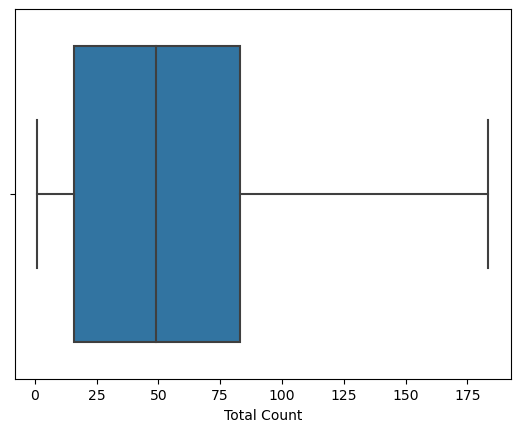

In [34]:
sns.boxplot(x=ds4['Total Count'])

# HEATMAP

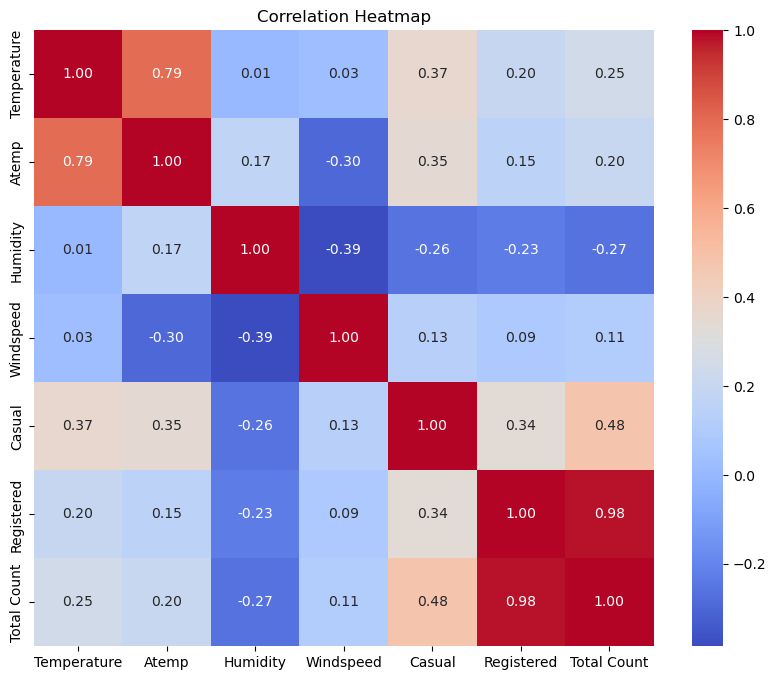

In [35]:
heatmap_data = ds4[['Temperature', 'Atemp', 'Humidity', 'Windspeed', 'Casual', 'Registered', 'Total Count']]

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

 In Correlation Heatmap,
 
 It is clearly showing that when Temperature increase, Atemp also increase.
 
 Also, Casual and Registered are the base for the Total Count.
 
 Windspeed, Humidity and Temperature are co-relative to each other.

In [36]:
ds4.to_csv('final_data.csv')

# Here is final data after all Pre-processing and visualisations and outliers.